<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터프레임-순회-처리" data-toc-modified-id="데이터프레임-순회-처리-1">데이터프레임 순회 처리</a></span></li><li><span><a href="#일간-변동률로-주가-비교" data-toc-modified-id="일간-변동률로-주가-비교-2">일간 변동률로 주가 비교</a></span></li><li><span><a href="#MDD" data-toc-modified-id="MDD-3">MDD</a></span></li><li><span><a href="#회귀분석" data-toc-modified-id="회귀분석-4">회귀분석</a></span></li><li><span><a href="#상관계수" data-toc-modified-id="상관계수-5">상관계수</a></span></li></ul></div>

In [1]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd

In [2]:
goog = fdr.DataReader('goog', '2020')
goog

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,1367.4,1341.6,1368.1,1341.6,1410000.0,0.0227
2020-01-03,1360.7,1347.9,1372.5,1345.5,1190000.0,-0.0049
2020-01-06,1394.2,1350.0,1396.5,1350.0,1730000.0,0.0247
2020-01-07,1393.3,1397.9,1403.0,1390.4,1510000.0,-0.0006
2020-01-08,1404.3,1392.1,1411.6,1390.8,1530000.0,0.0079
...,...,...,...,...,...,...
2021-10-08,2801.1,2798.1,2806.3,2788.6,946420.0,0.0063
2021-10-11,2776.9,2796.0,2815.3,2776.1,826700.0,-0.0086
2021-10-12,2734.3,2792.8,2793.9,2725.0,1130000.0,-0.0154


## 데이터프레임 순회 처리

In [3]:
for i in goog.index:
    print(i, goog.Close[i])

2020-01-02 00:00:00 1367.4
2020-01-03 00:00:00 1360.7
2020-01-06 00:00:00 1394.2
2020-01-07 00:00:00 1393.3
2020-01-08 00:00:00 1404.3
2020-01-09 00:00:00 1419.8
2020-01-10 00:00:00 1429.7
2020-01-13 00:00:00 1439.2
2020-01-14 00:00:00 1430.9
2020-01-15 00:00:00 1439.2
2020-01-16 00:00:00 1451.7
2020-01-17 00:00:00 1480.4
2020-01-21 00:00:00 1484.4
2020-01-22 00:00:00 1485.9
2020-01-23 00:00:00 1486.7
2020-01-24 00:00:00 1466.7
2020-01-27 00:00:00 1433.9
2020-01-28 00:00:00 1452.6
2020-01-29 00:00:00 1458.6
2020-01-30 00:00:00 1455.8
2020-01-31 00:00:00 1434.2
2020-02-03 00:00:00 1485.9
2020-02-04 00:00:00 1447.1
2020-02-05 00:00:00 1448.2
2020-02-06 00:00:00 1476.2
2020-02-07 00:00:00 1479.2
2020-02-10 00:00:00 1508.7
2020-02-11 00:00:00 1508.8
2020-02-12 00:00:00 1518.3
2020-02-13 00:00:00 1514.7
2020-02-14 00:00:00 1520.7
2020-02-18 00:00:00 1519.7
2020-02-19 00:00:00 1526.7
2020-02-20 00:00:00 1518.2
2020-02-21 00:00:00 1485.1
2020-02-24 00:00:00 1421.6
2020-02-25 00:00:00 1388.4
2

In [4]:
for row in goog.itertuples():
    print(row.Index, row.Close)

2020-01-02 00:00:00 1367.4
2020-01-03 00:00:00 1360.7
2020-01-06 00:00:00 1394.2
2020-01-07 00:00:00 1393.3
2020-01-08 00:00:00 1404.3
2020-01-09 00:00:00 1419.8
2020-01-10 00:00:00 1429.7
2020-01-13 00:00:00 1439.2
2020-01-14 00:00:00 1430.9
2020-01-15 00:00:00 1439.2
2020-01-16 00:00:00 1451.7
2020-01-17 00:00:00 1480.4
2020-01-21 00:00:00 1484.4
2020-01-22 00:00:00 1485.9
2020-01-23 00:00:00 1486.7
2020-01-24 00:00:00 1466.7
2020-01-27 00:00:00 1433.9
2020-01-28 00:00:00 1452.6
2020-01-29 00:00:00 1458.6
2020-01-30 00:00:00 1455.8
2020-01-31 00:00:00 1434.2
2020-02-03 00:00:00 1485.9
2020-02-04 00:00:00 1447.1
2020-02-05 00:00:00 1448.2
2020-02-06 00:00:00 1476.2
2020-02-07 00:00:00 1479.2
2020-02-10 00:00:00 1508.7
2020-02-11 00:00:00 1508.8
2020-02-12 00:00:00 1518.3
2020-02-13 00:00:00 1514.7
2020-02-14 00:00:00 1520.7
2020-02-18 00:00:00 1519.7
2020-02-19 00:00:00 1526.7
2020-02-20 00:00:00 1518.2
2020-02-21 00:00:00 1485.1
2020-02-24 00:00:00 1421.6
2020-02-25 00:00:00 1388.4
2

2021-10-14 00:00:00 2828.2


In [5]:
for i, row in goog.iterrows():
    print(i, row.Close)

2020-01-02 00:00:00 1367.4
2020-01-03 00:00:00 1360.7
2020-01-06 00:00:00 1394.2
2020-01-07 00:00:00 1393.3
2020-01-08 00:00:00 1404.3
2020-01-09 00:00:00 1419.8
2020-01-10 00:00:00 1429.7
2020-01-13 00:00:00 1439.2
2020-01-14 00:00:00 1430.9
2020-01-15 00:00:00 1439.2
2020-01-16 00:00:00 1451.7
2020-01-17 00:00:00 1480.4
2020-01-21 00:00:00 1484.4
2020-01-22 00:00:00 1485.9
2020-01-23 00:00:00 1486.7
2020-01-24 00:00:00 1466.7
2020-01-27 00:00:00 1433.9
2020-01-28 00:00:00 1452.6
2020-01-29 00:00:00 1458.6
2020-01-30 00:00:00 1455.8
2020-01-31 00:00:00 1434.2
2020-02-03 00:00:00 1485.9
2020-02-04 00:00:00 1447.1
2020-02-05 00:00:00 1448.2
2020-02-06 00:00:00 1476.2
2020-02-07 00:00:00 1479.2
2020-02-10 00:00:00 1508.7
2020-02-11 00:00:00 1508.8
2020-02-12 00:00:00 1518.3
2020-02-13 00:00:00 1514.7
2020-02-14 00:00:00 1520.7
2020-02-18 00:00:00 1519.7
2020-02-19 00:00:00 1526.7
2020-02-20 00:00:00 1518.2
2020-02-21 00:00:00 1485.1
2020-02-24 00:00:00 1421.6
2020-02-25 00:00:00 1388.4
2

2021-03-23 00:00:00 2053.0
2021-03-24 00:00:00 2045.1
2021-03-25 00:00:00 2044.4
2021-03-26 00:00:00 2035.6
2021-03-29 00:00:00 2055.9
2021-03-30 00:00:00 2055.5
2021-03-31 00:00:00 2068.6
2021-04-01 00:00:00 2137.8
2021-04-05 00:00:00 2225.6
2021-04-06 00:00:00 2224.8
2021-04-07 00:00:00 2249.7
2021-04-08 00:00:00 2265.4
2021-04-09 00:00:00 2285.9
2021-04-12 00:00:00 2254.8
2021-04-13 00:00:00 2267.3
2021-04-14 00:00:00 2254.8
2021-04-15 00:00:00 2296.7
2021-04-16 00:00:00 2297.8
2021-04-19 00:00:00 2302.4
2021-04-20 00:00:00 2293.6
2021-04-21 00:00:00 2293.3
2021-04-22 00:00:00 2267.9
2021-04-23 00:00:00 2315.3
2021-04-26 00:00:00 2326.7
2021-04-27 00:00:00 2307.1
2021-04-28 00:00:00 2379.9
2021-04-29 00:00:00 2429.9
2021-04-30 00:00:00 2410.1
2021-05-03 00:00:00 2395.2
2021-05-04 00:00:00 2354.3
2021-05-05 00:00:00 2356.7
2021-05-06 00:00:00 2381.4
2021-05-07 00:00:00 2398.7
2021-05-10 00:00:00 2341.7
2021-05-11 00:00:00 2308.8
2021-05-12 00:00:00 2239.1
2021-05-13 00:00:00 2262.0
2

---

## 일간 변동률로 주가 비교

In [6]:
goog_return = pd.DataFrame(goog.Close)
goog_return['Daily_Change_pct'] = (goog_return / goog_return.shift(1) - 1) * 100
goog_return['pct_change'] = goog_return['Close'].pct_change() * 100

goog_return
goog_return['pct_change'].plot(kind='hist', bins=18)

,Close,Daily_Change_pct,pct_change
Date,,,
2020-01-02,1367.4,NaN,NaN
2020-01-03,1360.7,-0.489981,-0.489981
2020-01-06,1394.2,2.461968,2.461968
2020-01-07,1393.3,-0.064553,-0.064553
2020-01-08,1404.3,0.789493,0.789493
...,...,...,...
2021-10-08,2801.1,0.625067,0.625067
2021-10-11,2776.9,-0.863946,-0.863946
2021-10-12,2734.3,-1.534085,-1.534085


<AxesSubplot:ylabel='Frequency'>

In [7]:
goog_return['pct_change'].describe()

count    450.000000
mean       0.182898
std        2.063006
min      -11.101090
25%       -0.626742
50%        0.296157
75%        1.108945
max        9.399946
Name: pct_change, dtype: float64

In [8]:
goog_return['cumsum'] = goog_return['pct_change'].cumsum()
goog_return

,Close,Daily_Change_pct,pct_change,cumsum
Date,,,,
2020-01-02,1367.4,NaN,NaN,NaN
2020-01-03,1360.7,-0.489981,-0.489981,-0.489981
2020-01-06,1394.2,2.461968,2.461968,1.971987
2020-01-07,1393.3,-0.064553,-0.064553,1.907434
2020-01-08,1404.3,0.789493,0.789493,2.696927
...,...,...,...,...
2021-10-08,2801.1,0.625067,0.625067,81.290024
2021-10-11,2776.9,-0.863946,-0.863946,80.426077
2021-10-12,2734.3,-1.534085,-1.534085,78.891993


---

## MDD
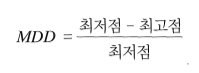

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

'MDD: -3.018844341594284'

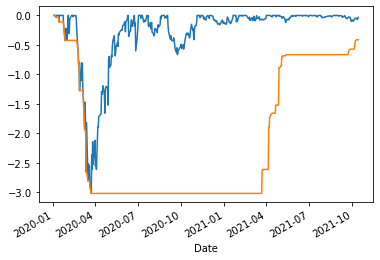

In [13]:
%matplotlib inline
peak = goog_return['cumsum'].rolling(252, min_periods=1).max()
drawdown = goog_return['cumsum']/peak - 1
MDD = drawdown.rolling(252, min_periods=1).min()

drawdown.plot()
MDD.plot()
f'MDD: {MDD.min()}'

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

'MDD: -0.3079190410689724'

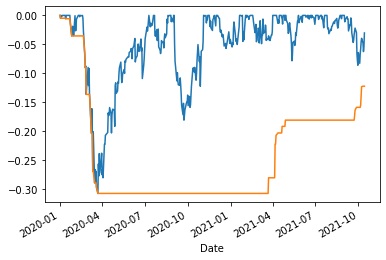

In [10]:
%matplotlib inline
peak = goog_return['Close'].rolling(252, min_periods=1).max()
drawdown = goog_return['Close']/peak - 1
MDD = drawdown.rolling(252, min_periods=1).min()

drawdown.plot()
MDD.plot()
f'MDD: {MDD.min()}'

In [79]:
MDD_date = MDD[MDD==MDD.min()]
MDD_date

Date
2020-03-23   -0.307919
2020-03-24   -0.307919
2020-03-25   -0.307919
2020-03-26   -0.307919
2020-03-27   -0.307919
                ...   
2021-03-16   -0.307919
2021-03-17   -0.307919
2021-03-18   -0.307919
2021-03-19   -0.307919
2021-03-22   -0.307919
Name: Close, Length: 252, dtype: float64

In [ ]:
파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트)

---

## 회귀분석

In [87]:
vix = fdr.DataReader('VIX', '2020') ## S&P500 VIX
aapl = fdr.DataReader('AAPL', '2020')

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

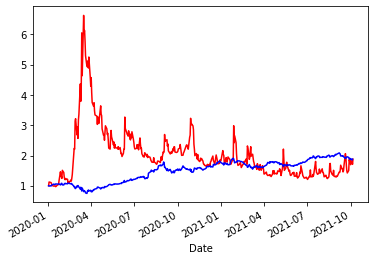

In [96]:
## 지수화
v = (vix.Close / vix.Close.loc['2020-01-02'])
a = (aapl.Close / aapl.Close.loc['2020-01-02'])
v.plot(color='r')
a.plot(color='b')

In [102]:
len(vix.iloc[:444])
len(aapl)

444

444

In [143]:
## linregress
from scipy import stats

X = vix.iloc[:444].Close
Y = aapl.Close
regr = stats.linregress(X, Y)
regr
regr_line = f'Y = {regr.slope:.2f}*X + {regr.intercept:.2f}'
regr_line

LinregressResult(slope=-1.4727612296245407, intercept=149.62459497863424, rvalue=-0.5923312970573428, pvalue=2.1475568752430963e-43, stderr=0.09528552462818445, intercept_stderr=2.6065624290244926)

'Y = -1.47*X + 149.62'

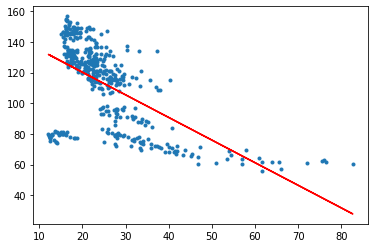

In [146]:
import matplotlib.pylab as plt

plt.plot(X, Y, '.')
plt.plot(X, regr.slope*X+regr.intercept, 'r')

## 상관계수

In [132]:
df = pd.DataFrame([vix.Close, aapl.Close], index=['vix', 'appl'])
df = df.T
df
df.corr()

,vix,appl
Date,,
2020-01-02,12.47,75.09
2020-01-03,14.02,74.36
2020-01-06,13.85,74.95
2020-01-07,13.79,74.60
2020-01-08,13.45,75.80
...,...,...
2021-09-30,23.14,141.50
2021-10-01,21.15,142.65
2021-10-04,22.96,139.14


,vix,appl
vix,1.000000,-0.588725
appl,-0.588725,1.000000


In [133]:
## Series
df.vix.corr(df.appl)

-0.5887253276042572

In [134]:
## 결정계수 R
cor_value = df.vix.corr(df.appl)
r_squared = cor_value ** 2
r_squared

0.34659751136274